# Algorithms and Fibonacci numbers
Matthew Carbone

Hills Hacks 23 Feb 2020

## Standard imports

In [1]:
import numpy as np
import time
import math
from IPython.display import clear_output

In [2]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [3]:
# I cannot stand the default matplotlib font
# This entire cell is optional
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
matplotlib.rc('font', family='TH Sarabun New')

clear_output()

In [4]:
# Will explain later:
MAGIC_NUMBER = 1.61803398875

## What is an algorithm, Fibonacci number, and why should you care?

**Algorithm**

* "A process or set of rules to be followed in calculations or other problem-solving operations, especially by a computer." - [Oxford Dictionary](https://www.lexico.com/en/definition/algorithm)
* If you want to do CS, you will need to *master* algorithms!
* In general, this means given a task, you want to accomplish it as quickly as possible, and by using as little memory and storage as possible.

**Fibonacci number**
* "In mathematics, the Fibonacci numbers, commonly denoted $F_n$, form a sequence, called the Fibonacci sequence, such that each number is the sum of the two preceding ones, starting from 0 and 1." - [Wikipedia](https://en.wikipedia.org/wiki/Fibonacci_number)
* The sequence is defined via the recursion relation
$$ F_n = F_{n-1} + F_{n-2} $$
for $n = \{2, 3, 4, ...\}$ and initial conditions $F_0 = 0$ and $F_1 = 1.$
* Why are they interesting? There are at least 10 different algorithms used to calculate them, each varying in computational complexity. This makes them a fascinating algorithms case study.

In [5]:
# Based on the recursion above, these are the first 13 Fibonacci numbers.
# We can use this "ground truth" to ensure our algorithms are working
# properly.
FIB_VALS_13 = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

## Attempt #1: write the equation in code form


As a first pass, you might feel the simplest way to write code to generate Fibonacci numbers is to just mimic the mathematical recursion relation above, so let's try that out.

In [6]:
def fib_recursion(n):
    """Returns the nth Fibonacci number computed via recursion. I have
    "golfed" down the code below the save space. It is equivalent to:

    if n < 2:
        return n
    else:
        return fib_recursion(n - 1) + fib_recursion(n - 2)
    """

    return fib_recursion(n - 1) + fib_recursion(n - 2) if n >= 2 else n

In [7]:
fib_recursion_13 = [fib_recursion(n) for n in range(13)]
assert fib_recursion_13 == FIB_VALS_13

### Pitfalls of recursive algorithms

A recursive function calls itself. Python supports this and it is not necessarily bad practice to write recursive functions. For instance, imagine a function that generates a random number between 1 and `x`, but you don't ever want it to return 5. A perfectly appropriate recursive function might be:

In [8]:
def rand_not_5(x):
    """Returns a random number between 1 (inclusive) and x (exclusive),
    but not 5."""

    r = np.random.randint(1, x)
    return r if r != 5 else rand_not_5(x)

In [9]:
many_numbers_not_5 = np.array([rand_not_5(10) for __ in range(1000)])
print("# of 5's in the list is %i" % np.sum(many_numbers_not_5 == 5))
print("The length of the list is %i" % len(many_numbers_not_5))

# of 5's in the list is 0
The length of the list is 1000


The problem with recursive functions is when *each* function call is computationally expensive! This is the problem we run into with the Fibonacci number function `fib_recursion`. The question is, can we quantify just how quickly the algorithm runs? Well, we can time it, which seems like the easiest way (it isn't!) so let's try that.

In [10]:
def time_func(f, f_args, n_stat):
    """Times the execution of function over n_stat runs, and returns
    an average and standard deviation. Note that we're not checking
    for correctness here, we're assuming that the algorithms produce
    the correct results.
    
    Parameters
    ----------
    f : function
        The function to test.
    f_args : list
        Function arguments.
    n_stat : int
        Number of statistical trials to run.

    Returns
    -------
    Mean and standard deviation of the time it took to run the function.
    """

    t = []
    for __ in range(n_stat):
        t0 = time.time()
        __ = f(*f_args)
        t.append(time.time() - t0)

    return float(np.mean(t)), float(np.std(t))

Let's see how the function performs when we want to compute larger and larger Fibonacci numbers.

### Runtime analysis

In [11]:
n_fib_grid_1 = np.arange(1, 25, 2)
times_1 = []
spread_1 = []
n_stat = 10
for n in n_fib_grid_1:
    m, s = time_func(fib_recursion, [n], n_stat)
    times_1.append(m)
    spread_1.append(s)

And now let's plot there results to get an approximate idea:


findfont: Font family ['TH Sarabun New'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TH Sarabun New'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TH Sarabun New'] not found. Falling back to DejaVu Sans.
/Users/mc/miniconda3/lib/python3.7/site-packages/matplotlib/mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


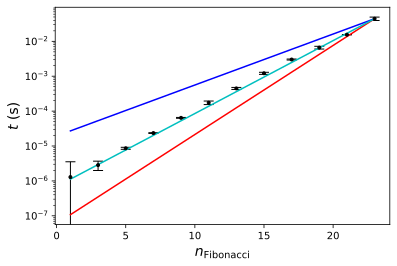

In [12]:
plt.clf()
plt.yscale('log')  # <- note the scale here
#plt.xscale('log')
plt.errorbar(x=n_fib_grid_1,
             y=times_1,
             yerr=spread_1,
             linewidth=0,
             color='black',
             marker='o',
             ms=3,
             capthick=1,
             capsize=5,
             elinewidth=1)
plt.plot(n_fib_grid_1, 1.8**n_fib_grid_1/1.8**(n_fib_grid_1[-1]) * times_1[-1], 'r')
plt.plot(n_fib_grid_1, 1.4**n_fib_grid_1/1.4**(n_fib_grid_1[-1]) * times_1[-1], 'b')
plt.plot(n_fib_grid_1, MAGIC_NUMBER**n_fib_grid_1/MAGIC_NUMBER**(n_fib_grid_1[-1]) * times_1[-1], 'c')
plt.ylabel(r"$t$ (s)", fontsize=14)
plt.xlabel(r"$n_\mathrm{Fibonacci}$", fontsize=14)
plt.show()

This looks like an exponential runtime scaling (read: very bad), but can we prove it? We make the following observations. 
* Let's assume that computing the $n=0$ and $n=1$ Fibonacci numbers occurs in "constant time" (note this is a good assumption).
* How long does it take to compute the $n$th Fibonacci number? Well, it takes as long as the sum of the $(n-1)$th and the $(n-2)$th, plus the time it takes to add them (we also assume constant time to perform addition). So we can write
$$ T(n) = T(n-1) + T(n-2),$$
where $T(n)$ is the runtime of the $n$th Fibonacci number calculation.
* Can we guess a functional form of $T(n)$? How about $T(n) = C^n,$ where $C$ is some constant.
$$ C^n = C^{n-1} + C^{n-2}.$$
* We can divide now by $C^{n-2},$ move things to the same side, and produce the following equation:
$$ C^2 - C - 1 = 0.$$
* You can solve this via the quadratic formula! If you do, you'll find that the positive solution $C = \phi = (1+\sqrt{5})/2 \approx 1.61.$ *This is the golden ratio!* Check out this excellent [Numberphile video](https://www.youtube.com/watch?v=sj8Sg8qnjOg) on the topic!
* This means that to compute the $n$th Fibonacci number like this, it will take you some time proportional to $\phi^n,$ in other words, exponentially large amounts of time:
$$ \mathrm{runtime} \: T(n) = a \phi^n$$
* Because *at worst* the program will run in time proportional to $\phi^n,$ we say this program has *time-complexity* $O(\phi^n).$

## Attempt #2: can we avoid computing things many times?

Observe that we calculate many things many times. Each instance of the recursive call, for instance, needs to re-calculate every Fibonacci number below it.
* You can draw a tree to represent this.
* The recursive algorithm is a *top-down* approach.
* We can do better by implementing a *bottom-up* approach, also known as dynamic programming (see [here](https://en.wikipedia.org/wiki/Dynamic_programming#Fibonacci_sequence) for an explanation in the context of the Fibonacci sequence).
* In a bottom-up approach, we compute things only once, then store them for later access in approximately constant time. We can either "pop" them as we go (see `fib_dp` below), or keep them for constant time access in a process known as memoization. This is the difference between a space-complexity $O(1)$ and $O(n).$

In [13]:
def fib_dp(n):
    """Returns the nth Fibonacci number computed using dynamic
    programming."""

    # The trivial cases first
    if n < 2:
        return n
    
    # Now the non-trivial cases: we start from the bottom, and go to the
    # top!
    fib0 = 0  # start from F(n=0)
    fib1 = 1  # and F(n=1)
    for ii in range(2, n + 1):

        # The next Fibonacci number is just a sum of the previous two
        fib2 = fib1 + fib0

        # Iterate fib1, fib0 <- fib2, fib1
        fib0 = fib1
        fib1 = fib2
    
    return fib2

In [14]:
# Good, the algorithm works!
test_fib_dp = [fib_dp(ii) for ii in range(13)]
assert test_fib_dp == FIB_VALS_13

In [15]:
# How about speed?

# Why use np.unique here?
n_fib_grid_2 = np.unique(np.logspace(0, 5.5, 10, dtype=int))
print(n_fib_grid_2)

times_2 = []
spread_2 = []
n_stat = 10
for n in n_fib_grid_2:
    m, s = time_func(fib_dp, [n], n_stat)
    times_2.append(m)
    spread_2.append(s)

[     1      4     16     68    278   1136   4641  18957  77426 316227]


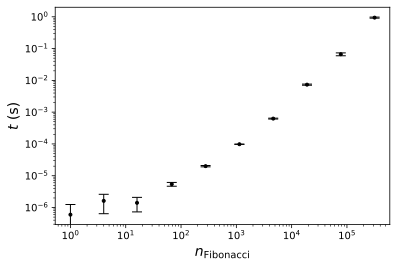

In [16]:
plt.clf()
plt.yscale('log')
plt.xscale('log')
plt.errorbar(x=n_fib_grid_2,
             y=times_2,
             yerr=spread_2,
             linewidth=0,
             color='black',
             marker='o',
             ms=3,
             capthick=1,
             capsize=5,
             elinewidth=1)
plt.ylabel(r"$t$ (s)", fontsize=14)
plt.xlabel(r"$n_\mathrm{Fibonacci}$", fontsize=14)
plt.show()

Looks like linear time scaling (for large $n$), amazing! Can we prove it?
* The function `fib_dp` has a single for loop which iterates over `n` numbers, where `n` is the Fibonacci number in question.
* Each for loop executes a single sum and two reassignments. We can treat each of these operations as constant-time. Thus, we have $\propto n$ constant time operations, indicating linear time-complexity: $O(n).$

## Attempt #3: can we do even better?

There is actually a very tricky way to do this calculation in even less time, but it is very hard to find. A clever mathematician can prove that

$$ \begin{bmatrix} 1 & 1 \\ 1 & 0 \end{bmatrix}^n = \begin{bmatrix} F_{n+1} & F_n \\ F_n & F_{n-1}\end{bmatrix}$$

via mathematical induction.

In [21]:
def matrix_power(A, n):
    """Checkout https://fulmicoton.com/posts/fibonacci/ for some more
    details on this particular algorithm. I have adapted it here using
    numpy matrix multiplication but the idea is the same."""
    
    if n == 0:
        return np.matrix([[1, 0], [0,1]])
    if n % 2 == 1:
        return A @ matrix_power(A, n - 1)
    else:
        root = matrix_power(A, n / 2)
        return root @ root

def fib_matmul(n):
    return matrix_power(np.matrix([[0, 1], [1, 1]]), n)[0, 1]

In [22]:
# Ensure correctness
test_fib_matmul = [fib_matmul(ii) for ii in range(13)]
assert test_fib_matmul == FIB_VALS_13

In [23]:
# How about speed?

# Why use np.unique here?
n_fib_grid_3 = np.unique(np.logspace(0, 8.5, 10, dtype=int))
print(n_fib_grid_3)

times_3 = []
spread_3 = []
n_stat = 10
for n in n_fib_grid_3:
    m, s = time_func(fib_matmul, [n], n_stat)
    times_3.append(m)
    spread_3.append(s)

[        1         8        77       681      5994     52749    464158
   4084238  35938136 316227766]


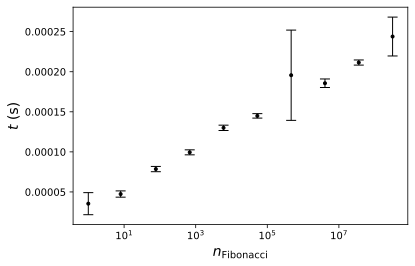

In [24]:
plt.clf()
#plt.yscale('log')
plt.xscale('log')
plt.errorbar(x=n_fib_grid_3,
             y=times_3,
             yerr=spread_3,
             linewidth=0,
             color='black',
             marker='o',
             ms=3,
             capthick=1,
             capsize=5,
             elinewidth=1)
# plt.plot(n_fib_grid, 1.8**n_fib_grid * times[0], 'r')
# plt.plot(n_fib_grid, 1.4**n_fib_grid * times[0], 'b')
# plt.plot(n_fib_grid, 1.61**n_fib_grid * times[0], 'c--')
plt.ylabel(r"$t$ (s)", fontsize=14)
plt.xlabel(r"$n_\mathrm{Fibonacci}$", fontsize=14)
plt.show()

## Attempt #4: cracking the sequence analytically

It may be crazy to think we can do even better than this, but it is actually possible. The $n$th Fibonacci number has a closed analytic form:

$$ F_n = (\phi_+^n - \phi_-^n)/\sqrt{5},$$

where

$$ \phi_\pm = (1 \pm \sqrt{5})/2.$$

In [25]:
PHI_P = (1.0 + math.sqrt(5)) / 2.0
PHI_M = (1.0 - math.sqrt(5)) / 2.0
def fib_ana(n):
    return math.floor((PHI_P**n - PHI_M**n) / math.sqrt(5))

In [26]:
# Ensure correctness
test_fib_ana = [fib_ana(ii) for ii in range(13)]
assert test_fib_ana == FIB_VALS_13

In [27]:
# How about speed?

# Why use np.unique here?
n_fib_grid_4 = np.unique(np.logspace(0, 7.5, 10, dtype=int))
print(n_fib_grid_4)

times_4 = []
spread_4 = []
n_stat = 10
for n in n_fib_grid_4:
    m, s = time_func(fib_matmul, [n], n_stat)
    times_4.append(m)
    spread_4.append(s)

[       1        6       46      316     2154    14677   100000   681292
  4641588 31622776]


## Let's plot everything at once

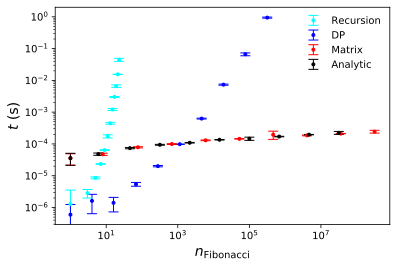

In [28]:
plt.clf()
plt.yscale('log')
plt.xscale('log')

plt.errorbar(x=n_fib_grid_1,
             y=times_1,
             yerr=spread_1,
             linewidth=0,
             color='cyan',
             marker='o',
             ms=3,
             capthick=1,
             capsize=5,
             elinewidth=1,
             label='Recursion')

plt.errorbar(x=n_fib_grid_2,
             y=times_2,
             yerr=spread_2,
             linewidth=0,
             color='blue',
             marker='o',
             ms=3,
             capthick=1,
             capsize=5,
             elinewidth=1,
             label='DP')

plt.errorbar(x=n_fib_grid_3,
             y=times_3,
             yerr=spread_3,
             linewidth=0,
             color='red',
             marker='o',
             ms=3,
             capthick=1,
             capsize=5,
             elinewidth=1,
             label='Matrix')

plt.errorbar(x=n_fib_grid_4,
             y=times_4,
             yerr=spread_4,
             linewidth=0,
             color='black',
             marker='o',
             ms=3,
             capthick=1,
             capsize=5,
             elinewidth=1,
             label='Analytic')
# plt.plot(n_fib_grid, 1.8**n_fib_grid * times[0], 'r')
# plt.plot(n_fib_grid, 1.4**n_fib_grid * times[0], 'b')
# plt.plot(n_fib_grid, 1.61**n_fib_grid * times[0], 'c--')
plt.ylabel(r"$t$ (s)", fontsize=14)
plt.xlabel(r"$n_\mathrm{Fibonacci}$", fontsize=14)
plt.legend(frameon=False)
plt.show()